In [6]:
!pip list

Package                                  Version
---------------------------------------- -----------
absl-py                                  2.1.0
aiohttp                                  3.9.5
aiosignal                                1.3.1
altair                                   5.3.0
annotated-types                          0.6.0
anyio                                    4.3.0
asgiref                                  3.8.1
asttokens                                2.4.1
astunparse                               1.6.3
async-timeout                            4.0.3
attrs                                    23.2.0
backoff                                  2.2.1
bcrypt                                   4.1.3
blinker                                  1.8.2
build                                    1.2.1
cachetools                               5.3.3
certifi                                  2024.2.2
cffi                                     1.16.0
charset-normalizer                       3.3.2


In [1]:
!pip install PyMuPDF

   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB 1.3 MB/s eta 0:00:03
   - -------------------------------------- 0.1/3.2 MB 1.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.2/3.2 MB 2.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.3/3.2 MB 1.8 MB/s eta 0:00:02
   ----- ---------------------------------- 0.5/3.2 MB 2.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.6/3.2 MB 2.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.7/3.2 MB 2.4 MB/s eta 0:00:02
   ---------- ----------------------------- 0.8/3.2 MB 2.3 MB/s eta 0:00:02
   ---------- ----------------------------- 0.9/3.2 MB 2.2 MB/s eta 0:00:02
   ----------- ---------------------------- 0.9/3.2 MB 2.2 MB/s eta 0:00:02
   ------------ --------------------------- 1.0/3.2 MB 2.1 MB/s eta 0:00:02
   ------------ --------------------------- 1.0/3.2 MB 2.0 MB/s eta 0:00:02
   ------------- --

In [2]:
from langchain.llms import LlamaCpp
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate
import streamlit as st
import re

import base64
import numpy as np
from PIL import Image
import io
import os

import pypdf
import imghdr
import chromadb
from langchain_community.document_loaders import PyPDFLoader

import streamlit as st
#from streamlit_chromadb_connection.chromadb_connection import ChromadbConnection

In [5]:
llm = LlamaCpp(model_path=r"C:\Users\Marvin\Documents\WBS\Final_Project\LLM\Meta-Llama-3-8B-Instruct.Q4_K_M.gguf",
               max_tokens = 1000,
               temperature = 0.4,
               top_p = 1,
               n_gpu_layers = 15,
               n_ctx = 2048)

llama_model_loader: loaded meta data with 22 key-value pairs and 291 tensors from C:\Users\Marvin\Documents\WBS\Final_Project\LLM\Meta-Llama-3-8B-Instruct.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = .
llama_model_loader: - kv   2:                           llama.vocab_size u32              = 128256
llama_model_loader: - kv   3:                       llama.context_length u32              = 8192
llama_model_loader: - kv   4:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   5:                          llama.block_count u32              = 32
llama_model_loader: - kv   6:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   7: 

In [3]:
# Funktion zum Hochladen von Dateien aus einem Ordner
def upload_files_from_folder(folder_path):
    file_names = []
    # Überprüfe, ob der Ordner existiert
    if os.path.exists(folder_path):
        # Iteriere über die Dateien im Ordner
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            # Überprüfe, ob es sich um eine PDF-Datei handelt
            if os.path.isfile(file_path) and filename.lower().endswith('.pdf'):
                file_names.append(file_path)
    else:
        print("Der angegebene Ordner wurde nicht gefunden.")
    return file_names

# Lade die PDF-Dateien aus dem Ordner hoch
folder_path = input("Bitte geben Sie den Pfad des Ordners mit den PDF-Dateien ein: ")
file_names = upload_files_from_folder(folder_path)

# Initialisiere eine leere Liste für die Seiten der PDF-Dateien
all_pages = []

# Iteriere über die hochgeladenen Dateien
for file_name in file_names:
    # Erstelle einen PyPDFLoader und lade das PDF-Dokument
    loader = PyPDFLoader(file_name)
    pages = loader.load_and_split()
    all_pages.extend(pages)

# Gib die Anzahl der Seiten aus
print("Gesamtanzahl der Seiten:", len(all_pages))

# Gib den Inhalt der ersten Seite aus
print("Inhalt der ersten Seite:")
print(all_pages[0])



Gesamtanzahl der Seiten: 2
Inhalt der ersten Seite:
page_content='Sunken, scabby b acterial spot lesions on \nripening tomato fruit.  (Photo courtesy of Mary Ann \nHansen, Virginia Polytechnic Institute a nd State University)   \n  \n \nBacterial Spot of Tomato  \nMichelle Marks *, UW -Madison  Plant Pathology  \n \nWhat is bacterial  spot ?  Bacterial spot of tomato is a potentially devastating \ndisease that, in severe cases, can lead to unmarketable  fruit and even plant death.  \nBacterial sp ot can occur wherever tomatoes are grown, but is found most frequently \nin warm , wet climates, as well as in \ngreenhouses.  The disease  is often  an \nissue in Wisconsin.  \n \nWhat does bacterial  spot look \nlike?  Bacterial spot  can affect all above \nground parts of a tomato plant , including \nthe leaves, stem s, and fruit .  Bacterial \nspot appears on leaves as smal l (less \nthan ⅛ inch), some times water -soaked \n(i.e., wet -looking ) circular areas .  Spots \nmay initially be y

In [6]:
import fitz  # PyMuPDF
pdf_path = r"C:\Users\Marvin\Documents\WBS\Final_Project\Data\llm_train\bacterial_spots_only\Bacterial_Spot_of_Tomato.pdf"

def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as pdf_document:
        for page_number in range(len(pdf_document)):
            page = pdf_document.load_page(page_number)
            text += page.get_text()
    return text

# Beispielaufruf
pdf_text = extract_text_from_pdf(pdf_path)
print(pdf_text)


Sunken, scabby bacterial spot lesions on 
ripening tomato fruit.  (Photo courtesy of Mary Ann 
Hansen, Virginia Polytechnic Institute and State University) 
 
 
 
 
Bacterial Spot of Tomato 
Michelle Marks*, UW-Madison Plant Pathology 
 
What is bacterial spot?  Bacterial spot of tomato is a potentially devastating 
disease that, in severe cases, can lead to unmarketable fruit and even plant death.  
Bacterial spot can occur wherever tomatoes are grown, but is found most frequently 
in warm, wet climates, as well as in 
greenhouses.  The disease is often an 
issue in Wisconsin. 
 
What does bacterial spot look 
like?  Bacterial spot can affect all above 
ground parts of a tomato plant, including 
the leaves, stems, and fruit.  Bacterial 
spot appears on leaves as small (less 
than ⅛ inch), sometimes water-soaked 
(i.e., wet-looking) circular areas.  Spots 
may initially be yellow-green, but darken 
to brownish-red as they age.  When the 
disease 
is 
severe, 
extensive 
leaf 
yellowing

In [7]:
import fitz  # Importiere die PyMuPDF-Bibliothek

def extract_text_from_pdf(pdf_path):
    # Initialisiere eine leere Zeichenfolge für den extrahierten Text
    extracted_text = ""
    
    # Öffne das PDF-Dokument
    with fitz.open(pdf_path) as pdf_document:
        # Iteriere über die Seiten des PDF-Dokuments
        for page_number in range(len(pdf_document)):
            # Extrahiere den Text von der aktuellen Seite
            page = pdf_document.load_page(page_number)
            page_text = page.get_text()
            
            # Füge den extrahierten Text zur Gesamtzeichenfolge hinzu
            extracted_text += page_text
    
    return extracted_text

# Funktion zum Hochladen von Dateien aus einem Ordner
def upload_files_from_folder(folder_path):
    file_names = []
    # Überprüfe, ob der Ordner existiert
    if os.path.exists(folder_path):
        # Iteriere über die Dateien im Ordner
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            # Überprüfe, ob es sich um eine PDF-Datei handelt
            if os.path.isfile(file_path) and filename.lower().endswith('.pdf'):
                file_names.append(file_path)
    else:
        print("Der angegebene Ordner wurde nicht gefunden.")
    return file_names

# Lade die PDF-Dateien aus dem Ordner hoch
folder_path = input("Bitte geben Sie den Pfad des Ordners mit den PDF-Dateien ein: ")
file_names = upload_files_from_folder(folder_path)

# Initialisiere eine leere Liste für den extrahierten Text aller Seiten der PDF-Dateien
all_extracted_text = []

# Iteriere über die hochgeladenen Dateien
for file_name in file_names:
    # Extrahiere den Text aus dem aktuellen PDF-Dokument
    extracted_text = extract_text_from_pdf(file_name)
    all_extracted_text.append(extracted_text)

# Gib den extrahierten Text aus
for idx, text in enumerate(all_extracted_text, start=1):
    print(f"Text aus PDF-Datei {idx}:")
    print(text)


Text aus PDF-Datei 1:
Sunken, scabby bacterial spot lesions on 
ripening tomato fruit.  (Photo courtesy of Mary Ann 
Hansen, Virginia Polytechnic Institute and State University) 
 
 
 
 
Bacterial Spot of Tomato 
Michelle Marks*, UW-Madison Plant Pathology 
 
What is bacterial spot?  Bacterial spot of tomato is a potentially devastating 
disease that, in severe cases, can lead to unmarketable fruit and even plant death.  
Bacterial spot can occur wherever tomatoes are grown, but is found most frequently 
in warm, wet climates, as well as in 
greenhouses.  The disease is often an 
issue in Wisconsin. 
 
What does bacterial spot look 
like?  Bacterial spot can affect all above 
ground parts of a tomato plant, including 
the leaves, stems, and fruit.  Bacterial 
spot appears on leaves as small (less 
than ⅛ inch), sometimes water-soaked 
(i.e., wet-looking) circular areas.  Spots 
may initially be yellow-green, but darken 
to brownish-red as they age.  When the 
disease 
is 
severe, 
exte

In [15]:
import fitz

def save_text_as_pdf(text, output_pdf_path):
    # Öffne ein neues PDF-Dokument
    pdf_document = fitz.open()
    
    # Füge eine leere Seite hinzu
    page = pdf_document.new_page()
    
    # Füge den Text zur Seite hinzu
    page.insert_text((10, 10), text)
    
    # Speichere das PDF-Dokument
    pdf_document.save(output_pdf_path)
    pdf_document.close()

# Kombiniere den extrahierten Text zu einer einzigen Zeichenfolge
combined_text = "\n".join(all_extracted_text)

# Definiere den Ausgabepfad für die PDF-Datei
output_pdf_path = r"C:\Users\Marvin\Documents\WBS\Final_Project\Data\llm_train\all_in_one_pdf\combined_text.pdf"

# Speichere den kombinierten Text als PDF
save_text_as_pdf(combined_text, output_pdf_path)

print(f"Der kombinierte Text wurde als PDF unter '{output_pdf_path}' gespeichert.")



Der kombinierte Text wurde als PDF unter 'C:\Users\Marvin\Documents\WBS\Final_Project\Data\llm_train\all_in_one_pdf\combined_text.pdf' gespeichert.


In [4]:
from langchain.llms import LlamaCpp
from langchain import PromptTemplate
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
from langchain_text_splitters import CharacterTextSplitter

In [17]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(output_pdf_path)
pages = loader.load_and_split()

In [19]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=800,
                                               chunk_overlap=80)

docs = text_splitter.split_documents(pages)

In [20]:
# embeddings
embedding_model = "sentence-transformers/all-MiniLM-l6-v2"
embeddings_folder = r"C:\Users\Marvin\Documents\WBS\Final_Project\LLM\embeddings"
embeddings = HuggingFaceEmbeddings(model_name=embedding_model,
                                   cache_folder=embeddings_folder)

c:\Users\Marvin\miniconda3\envs\tf_llm_env3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Marvin\miniconda3\envs\tf_llm_env3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Marvin\miniconda3\envs\tf_llm_env3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [21]:
# save vector database
vector_db = Chroma.from_documents(docs, embeddings, persist_directory=r"C:\Users\Marvin\Documents\WBS\Final_Project\LLM\vector_db\chroma_db")

: 

In [7]:
# Load the Keras model
model = load_model(os.path.join(r'C:\Users\Marvin\Documents\WBS\Final_Project\Dr.-Greenthumb-Decoding-Nature-s-Needs\Models','multi_diseases_classifier_tomato_98.h5'))

# Define the class names based on your model
class_names = [
    'Tomato suffering of bacterial spots',
    'Tomato suffering of early blight',
    'This tomato looks healthy',
    'Tomato suffering of late blight',
    'Your Tomato has some leaf curl',
    'Tomato suffering of leaf mold',
    'Tomato suffering of mosaic virus... oh oh!',
    'Tomato suffering of septoria leaf spots',
    'Tomato infested by spider mites',
    'Tomato with target spots'
]

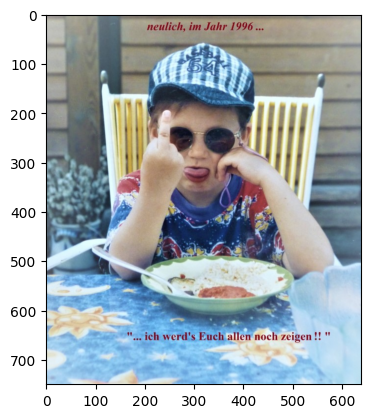

In [70]:
import matplotlib.pyplot as plt

# Load a test image
uploaded_file = cv2.imread(r'C:\Users\Marvin\Documents\WBS\Final_Project\Data\disese_plant_self_collected\Marvin 96.jpg')
plt.imshow(cv2.cvtColor(uploaded_file, cv2.COLOR_BGR2RGB))
plt.show()

In [73]:
# Resize the image to match model input shape (assuming your model expects (256, 256) input)
img_resized = tf.image.resize(uploaded_file, (256, 256))

# Normalize pixel values (assuming model was trained with normalized data)
img_normalized = img_resized / 255.0

# Add batch dimension
img_input = np.expand_dims(img_normalized, axis=0)

# Perform prediction
prediction_array = model.predict(img_input)
print(prediction_array)

# Get prediction probabilities for each class
prediction_probabilities = prediction_array[0]

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(prediction_probabilities)

# Get the predicted class label
predicted_class_label = class_names[predicted_class_index-1]

# Get the probability of the predicted class
predicted_class_probability = prediction_probabilities[predicted_class_index]

# Define a threshold for confidence
confidence_threshold = 0.99  # You can adjust this threshold as needed

# Check if the predicted probability exceeds the confidence threshold
if predicted_class_probability >= confidence_threshold:
    # If the predicted probability is high, display the predicted class label
    initial_response = f"Based on the uploaded image, I detected: {predicted_class_label}"
    print(initial_response)
else:
    # If the predicted probability is low, indicate uncertainty
    initial_response = "The model is uncertain about the prediction."
    print(initial_response)
 
 


1/1 [==============================] - 0s 20ms/step
[[2.6860889e-06 9.4379438e-04 2.0045541e-04 9.8731774e-01 4.6321115e-06
  1.1529129e-02 1.1829485e-10 7.7837274e-07 5.7099015e-07 1.9153848e-07]]
The model is uncertain about the prediction.


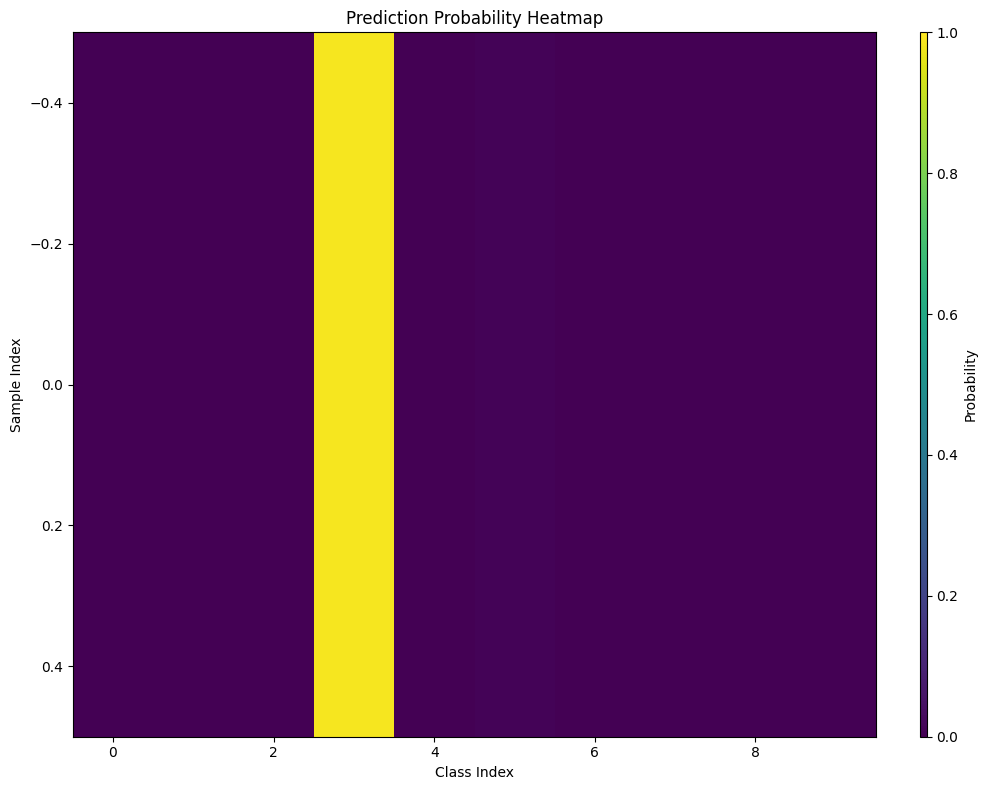

In [72]:
import matplotlib.pyplot as plt

# Setze die Farbskala und die Anzeigeoptionen für die Farbskala
cmap = 'viridis'
norm = plt.Normalize(vmin=0, vmax=1)

# Zeige die Heatmap des prediction_array
plt.figure(figsize=(10, 8))
plt.imshow(prediction_array, cmap=cmap, aspect='auto', norm=norm)
plt.colorbar(label='Probability', aspect=100, fraction=0.03)
plt.title('Prediction Probability Heatmap')
plt.xlabel('Class Index')
plt.ylabel('Sample Index')
plt.grid(False)  # Entferne Gitterlinien
plt.tight_layout()  # Stelle sicher, dass die Achsenbeschriftungen vollständig angezeigt werden
plt.show()



In [43]:
import seaborn as sns
conf_matrix = confusion_matrix(true_labels, predicted_class_label)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
predictions = model.predict(img_input)
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = class_names

print(classification_report(true_labels, predicted_labels))

1/1 [==============================] - 0s 21ms/step


ValueError: Found input variables with inconsistent numbers of samples: [10, 1]

In [54]:
conf_matrix = confusion_matrix(true_labels, prediction_array)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [10, 1]

In [1]:
import platform

# Retrieve system information
system_info = platform.uname()

# Create a dictionary to store hardware specs
hardware_specs = {
    "System": system_info.system,
    "Node Name": system_info.node,
    "Release": system_info.release,
    "Version": system_info.version,
    "Machine": system_info.machine,
    "Processor": system_info.processor
}

# Print hardware specs in a formatted way
for key, value in hardware_specs.items():
    print(f"{key}: {value}")


System: Windows
Node Name: DESKTOP-5TSK6U5
Release: 10
Version: 10.0.19045
Machine: AMD64
Processor: Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
